<a href="https://colab.research.google.com/github/860151558059/Titanic-Survival-Prediction-Project/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
# Required Libraris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [86]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/DataSet/Titanic-Dataset.csv')

In [87]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [89]:
df.shape

(891, 12)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [91]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

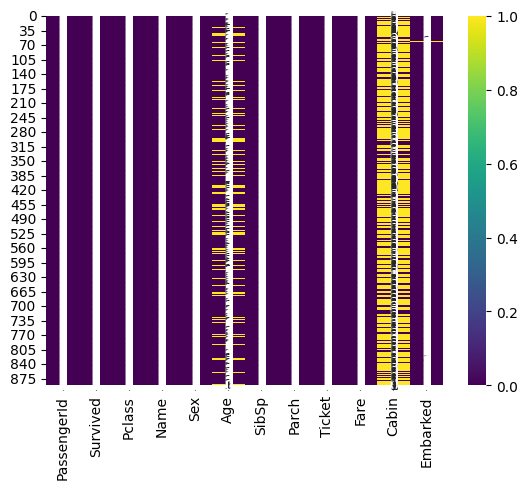

In [92]:
plt.figsize = (10, 10)
sns.heatmap(df.isnull(), annot = True, cmap = 'viridis')

In [93]:
AgeNull = (df.Age.isnull().sum()/len(df.Age)) * 100
print(f"The null values of Age : {AgeNull:.2f}%")

The null values of Age : 19.87%


In [94]:
CabinNull = (df.Cabin.isnull().sum()/len(df.Cabin)) * 100
print(f"The nulll values of Cabin : {CabinNull:.2f}%")

The nulll values of Cabin : 77.10%


In [95]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [96]:
df.drop('Cabin', inplace=True, axis=1)

In [97]:
df.Embarked.unique()
# S - Southamptop
# Q - Queenstown
# C - Cherbourg

array(['S', 'C', 'Q', nan], dtype=object)

In [98]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [99]:
df.loc[df.Pclass==1,'Embarked'].value_counts()

,count
Embarked,
S,127
C,85
Q,2


In [100]:
df.loc[df.Pclass==2,'Embarked'].value_counts()

,count
Embarked,
S,164
C,17
Q,3


In [101]:
df.loc[df.Pclass==3,'Embarked'].value_counts()

,count
Embarked,
S,353
Q,72
C,66


In [102]:
df.loc[df.Ticket=='113572','Embarked']

,Embarked
61,NaN
829,NaN


In [103]:
df =df.dropna(subset = ['Embarked'])

In [104]:
# Mean of the age
meanAge = df.Age.mean()
print(f'The mean of the age: {meanAge:.2f}')

The mean of the age: 29.64


In [105]:
# In case of the  outlire Mean will shift in large number so we will use
medianAge = df.Age.median()
print(f'The median of the age: {medianAge:.2f}')

The median of the age: 28.00


<Axes: ylabel='Age'>

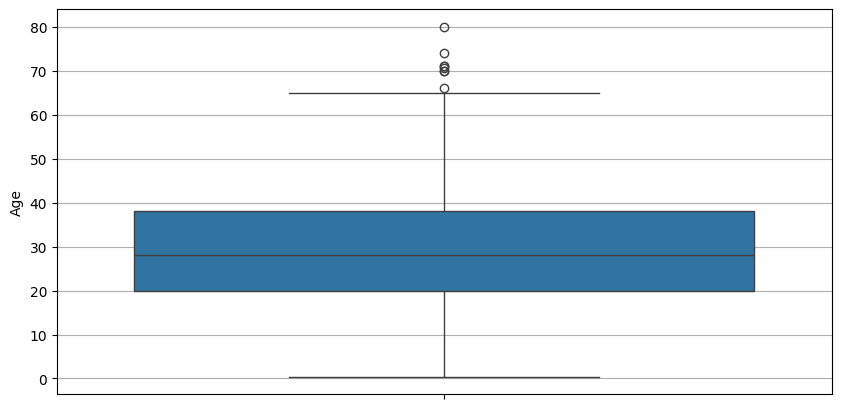

In [106]:
# plot a box plot
plt.figure(figsize=(10, 5))
plt.grid()
sns.boxplot(df.Age)

In [107]:
df.Age.value_counts()

,count
Age,
24.00,30
22.00,27
18.00,26
28.00,25
30.00,25
...,...
24.50,1
0.67,1
0.42,1


In [108]:
# Fill all the null values with the medianAge value

df.fillna({'Age':medianAge}, inplace=True)

In [109]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [110]:
df.drop(['PassengerId','Name', 'Ticket'], inplace=True, axis=1)

In [111]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<Axes: xlabel='Sex'>

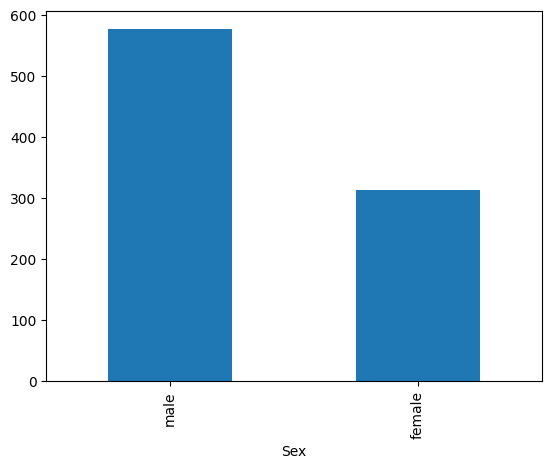

In [112]:
# Plot a graph that is strength of males vs femails
df.Sex.value_counts().plot.bar(df.Sex)

In [113]:
# What is the strength of the survival and not survival

<Axes: xlabel='Survived'>

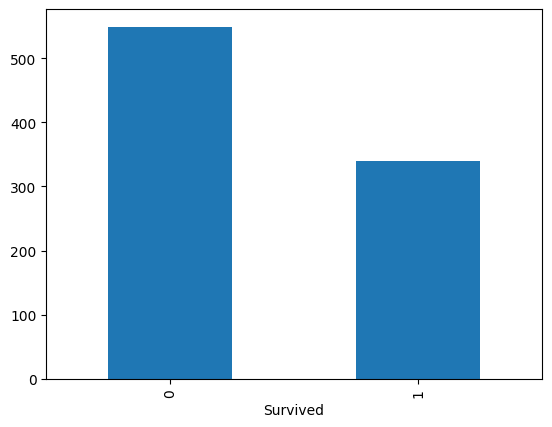

In [114]:
df.Survived.value_counts().plot.bar(df.Survived)

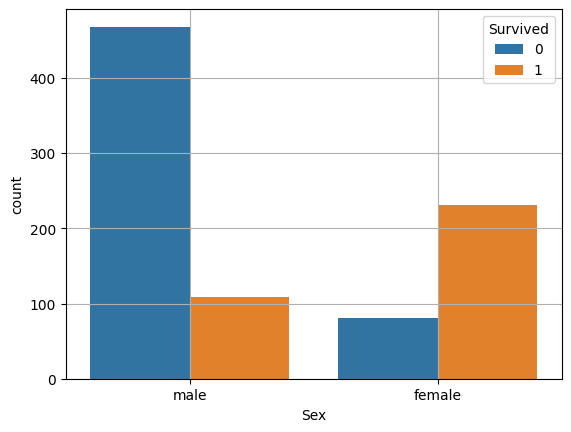

In [115]:
# How mant male and female are survived and not survived
sns.countplot(x='Sex', hue='Survived', data=df)
plt.grid()

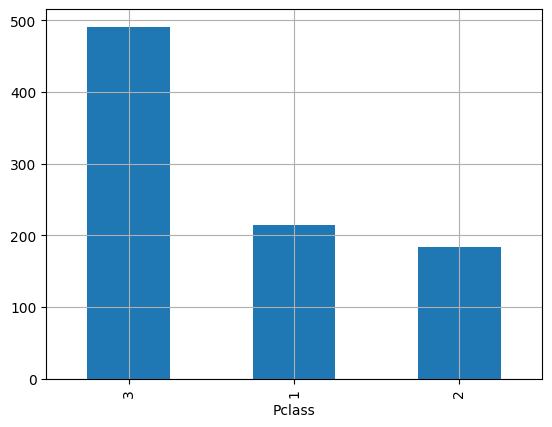

In [116]:
df.Pclass.value_counts().plot.bar(df.Sex)
plt.grid()

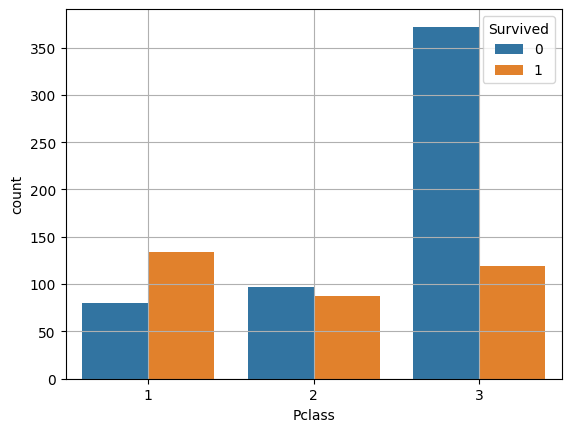

In [117]:
# survival with repect to the class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.grid()

Encoders to convert the data from the categorical form to the nummeric form without changing its meaning

In [118]:
from sklearn.preprocessing import LabelEncoder

In [119]:
enc = LabelEncoder()

In [120]:
df.Sex = enc.fit_transform(df.Sex)

In [121]:
df.Age = df.Age.astype(int)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    int64  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 62.5+ KB


In [123]:
df.Fare = round(df.Fare,2)

In [124]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.25,S
1,1,1,0,38,1,0,71.28,C
2,1,3,0,26,0,0,7.92,S
3,1,1,0,35,1,0,53.10,S
4,0,3,1,35,0,0,8.05,S


In [125]:
# One hot encoding for the column Embarked
# df = pd.get_dummies(df, columns=['Embarked'])
df = pd.get_dummies(df, columns=['Embarked'], dtype=int)

In [126]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22,1,0,7.25,0,0,1
1,1,1,0,38,1,0,71.28,1,0,0
2,1,3,0,26,0,0,7.92,0,0,1
3,1,1,0,35,1,0,53.10,0,0,1
4,0,3,1,35,0,0,8.05,0,0,1


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Sex         889 non-null    int64  
 3   Age         889 non-null    int64  
 4   SibSp       889 non-null    int64  
 5   Parch       889 non-null    int64  
 6   Fare        889 non-null    float64
 7   Embarked_C  889 non-null    int64  
 8   Embarked_Q  889 non-null    int64  
 9   Embarked_S  889 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 76.4 KB


<Axes: >

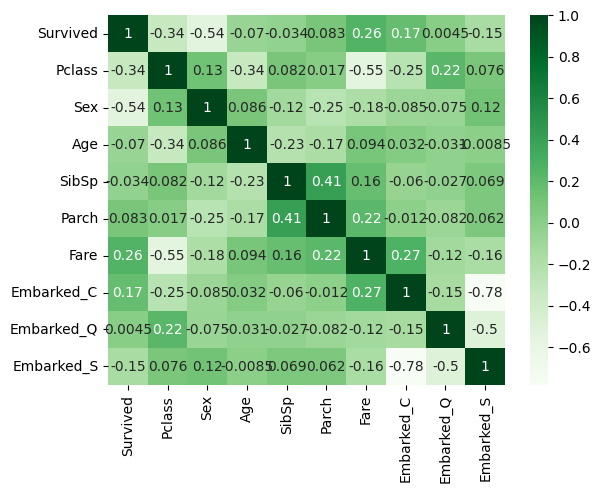

In [128]:
# Corelation
sns.heatmap(df.corr(),annot = True, cmap='Greens')

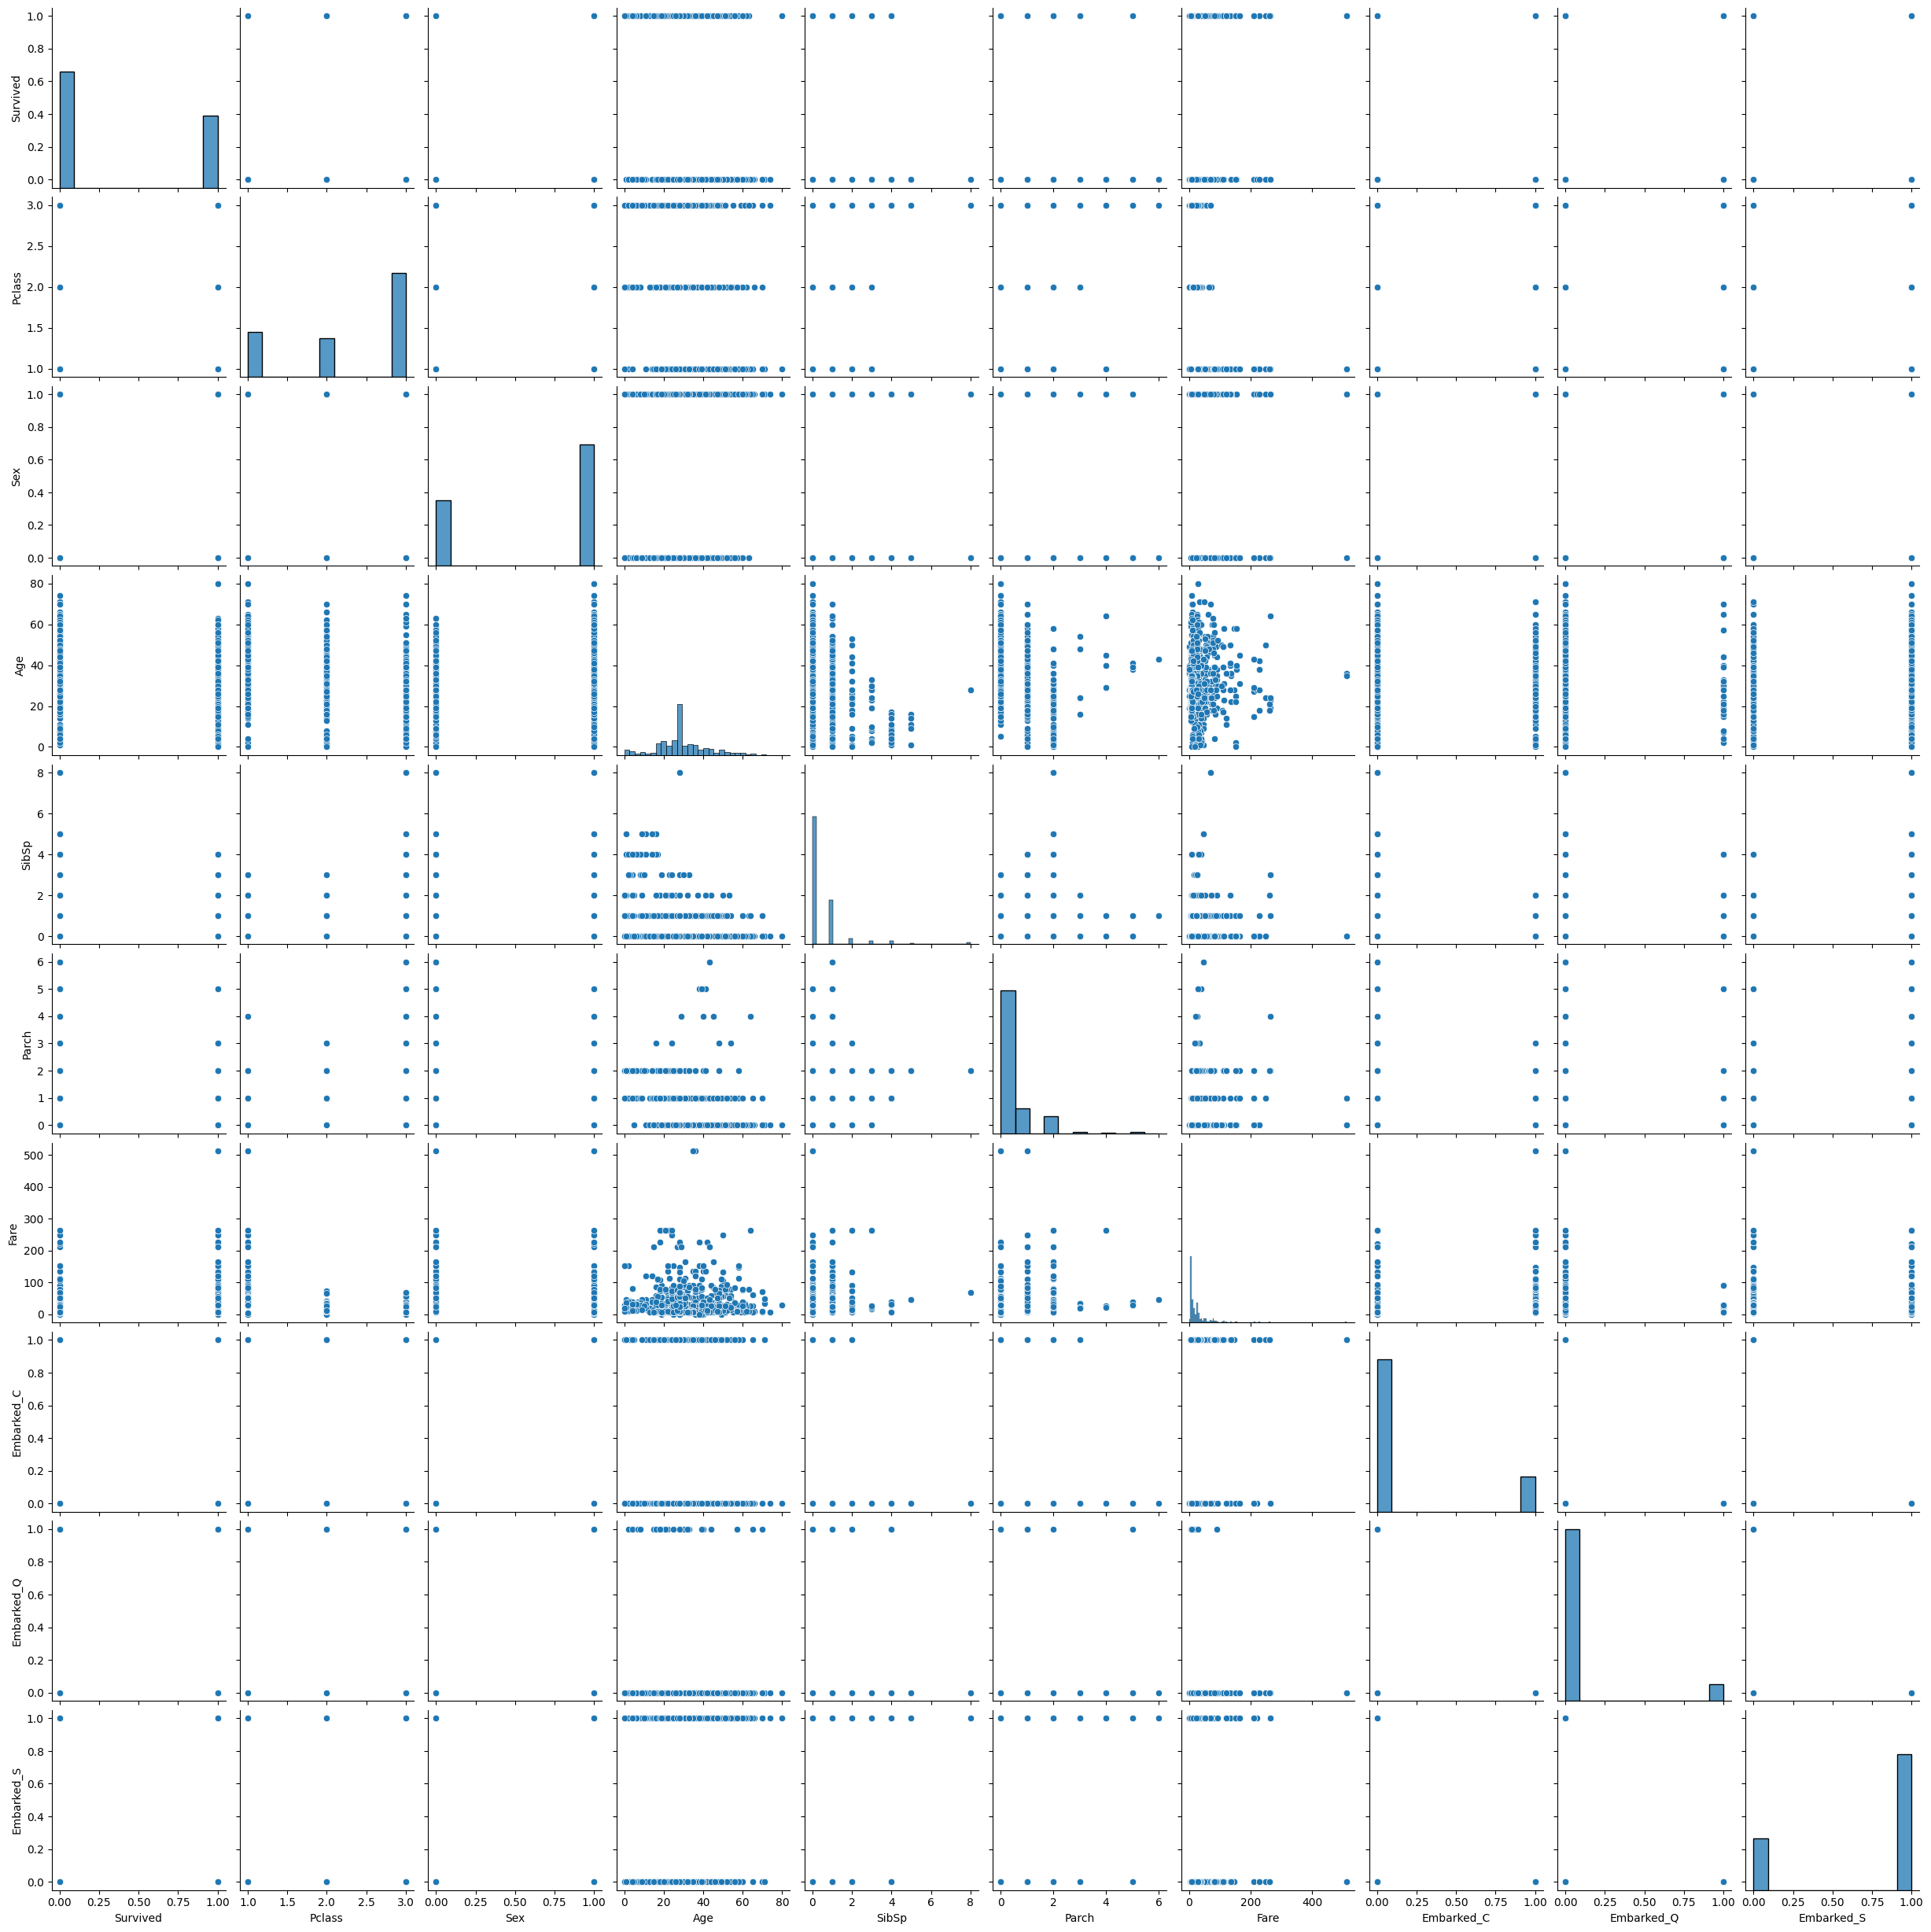

In [129]:
sns.pairplot(df)

Feature Importance / Feature Selection

In [130]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [131]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22,1,0,7.25,0,0,1
1,1,0,38,1,0,71.28,1,0,0
2,3,0,26,0,0,7.92,0,0,1
3,1,0,35,1,0,53.10,0,0,1
4,3,1,35,0,0,8.05,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,1,27,0,0,13.00,0,0,1
887,1,0,19,0,0,30.00,0,0,1
888,3,0,28,1,2,23.45,0,0,1
889,1,1,26,0,0,30.00,1,0,0


In [132]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [134]:
df.to_csv('/content/drive/MyDrive/DataSet/Cleaned_Titanic.csv', index=False)

In [135]:
from sklearn.ensemble import ExtraTreesClassifier

In [136]:
feat = ExtraTreesClassifier()

In [137]:
feat.fit(X,y)

ExtraTreesClassifier()

In [138]:
feat.feature_importances_

array([0.103708  , 0.29021808, 0.24429533, 0.04655648, 0.04478313,
       0.23896176, 0.01403154, 0.00612432, 0.01132136])

<Axes: >

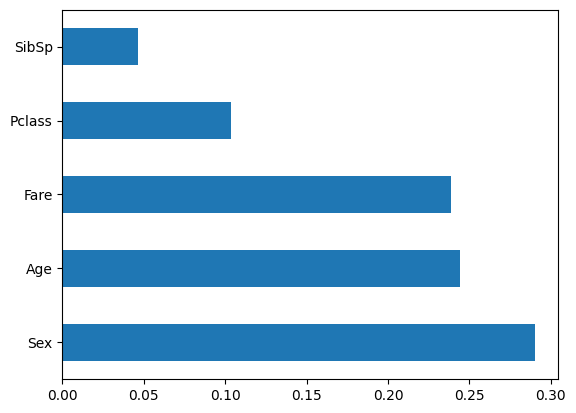

In [139]:
feat_imp = pd.Series(feat.feature_importances_, index=X.columns)
feat_imp.nlargest(5).plot(kind='barh')

ML part

In [140]:
# Spliting of the data without using train_test_split
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=32)

In [ ]:
# Get the first split only
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    break

In [141]:
# Model Selection
model = LogisticRegression()

In [142]:
model.fit(X_train, y_train)

LogisticRegression()

In [143]:
# Test the model
y_pred = model.predict(X_test)

In [145]:
# EDA
final = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

In [144]:
final.head()

,Actual,Predicted
2,1,1
7,0,0
11,1,1
13,0,0
21,1,0


<Axes: >

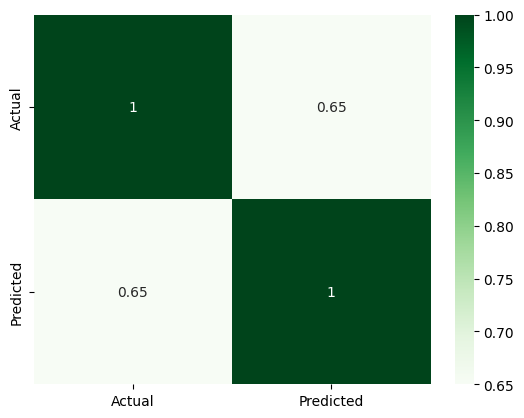

In [146]:
sns.heatmap(final.corr(), annot=True, cmap='Greens')

In [147]:
# Performance
confusion_matrix(y_test, y_pred)

array([[100,  10],
       [ 19,  49]])

In [148]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

Accuracy Score: 0.84


In [149]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.91      0.87       110\n           1       0.83      0.72      0.77        68\n\n    accuracy                           0.84       178\n   macro avg       0.84      0.81      0.82       178\nweighted avg       0.84      0.84      0.83       178\n'